# **Sistemi di Apprendimento Non Supervisionato**

## **Clustering**

Il **clustering** è l'operazione di **categorizzare** dei campioni in un dataset senza che questi abbiano necessariamente un'*etichetta* determinata a priori (*non c'è una label*).

Per fare un esempio, potremmo suddividere i nostri album musicali sulla base delle sonorità ispirate dal loro ascolto: in questo caso, non ci staremmo affidando ad una certa "etichetta", come ad esempio l'anno di produzione o l'artista, ma ad un concetto molto più "empirico", ovvero la vicinanza o meno dell'album ai nostri gusti musicali.

Ovviamente, dato che nel clustering i **campioni non considerano una label**, stiamo parlando di **apprendimento non supervisionato**. Se i campioni fossero etichettati, avremmo una normale procedura di classificazione.

Il clustering può avere numerose applicazioni: ad esempio, potrebbe essere usato per segmentare il mercato mediante dei profili di clientela simili, oppure per suddividere le immagini in zone simili, o ancora per individuare delle anomalie all'interno di un insieme di dati.

Una volta che il clustering è completo, ad ogni **cluster** viene assegnato un certo *identificativo*, che ci permette in qualche modo di "condensare" e "riassumere" le informazioni dell'intero cluster.

Quest'assegnazione può anche essere usata *come ingresso* ad altri sistemi di machine learning, ad esempio di classificazione, che possono usare l'identificativo assegnato come una vera e propria label.

## **Tipi di Clustering**

La scelta di un algoritmo di clustering deve essere condotta sulla base della **scalabilità** dello stesso. 

Infatti, laddove alcuni algoritmi di clustering confrontano tra loro *ogni possibile coppia di dati*, con una complessità $O(n^2)$ per $n$ campioni, altri, come il **k-means**, effettuano un numero molto più limitato di operazioni, ottenendo una complessità nell'ordine di $O(n)$ , il che cambia radicalmente la situazione nel caso di dataset con milioni di campioni.

Tuttavia, ogni algoritmo ha anche diversi vantaggi e svantaggi che devono essere valutati sulla base dell'applicazione scelta.

In genere ci sono quattro diverse categorie di clustering:

- nel **centroid-based clustering**, i dati sono organizzati secondo la loro *distanza* da dei *centroidi*, ovvero dei campioni considerati come "base" per ciascun cluster. Questo tipo di algoritmi risulta essere mediamente efficace, ma è sensibile alle condizioni iniziali ed alla presenza di eventuali outliers;

- nel **density-based clustering**, i dati sono organizzati in *aree ad alta densità*. Ciò permette la connessione di cluster di forma arbitraria, e facilita inoltre l'individuazione di outlier, che per definizione sono nelle zone a minore densità di campioni. Possono però essere sensibili a dataset con densità variabile ed alta dimensionalità;

- nel **distribution-based clustering**, si suppone che i dati abbiano *distribuzione gaussiana*, e siano quindi suddivisibili come tali. Questo tipo di algoritmi non è efficiente se non si conosce a priori il tipo di distribuzione dei dati;

- nello **hierarchical clustering** viene creato un *albero* a partire dai dati. Questo tipo di clustering è particolarmente efficace nel caso si trattino certi tipi di dati, come ad esempio le tassonomie, e prevede che possa essere selezionato un numero ridotto di cluster tagliando l'albero al giusto livello.



## **Workflow del clustering**

L'esecuzione di un algoritmo di clustering prevede *tre step*:

1. nel primo, dobbiamo *preparare i dati*, effettuando le operazioni che abbiamo visto in precedenza per la classificazione e la regressione;

2. nel secondo, dovremo definire una *metrica di similarità*;

3. nel terzo, eseguiremo l'*algoritmo* vero e proprio.

Concentriamoci per un attimo sul secondo step. Definire una **metrica di similarità** significa nella pratica stabilire *quando due campioni risultano essere simili tra loro*.

In tal senso, è possibile operare in due modi:

- la metrica può essere scelta *manualmente*, ovvero scegliendo le feature da considerare nella valutazione della distanza tra i campioni;

- oppure, la metrica può essere scelta in maniera *automatica* a partire da un **embedding**, ovvero da una *rappresentazione a dimensionalità ridotta* del dato iniziale.

Nel primo caso questo avviene in modo abbastanza intuitivo: se, ad esempio, volessimo suddividere un insieme di scarpe in base a taglia e prezzo, potremmo considerare la distanza euclidea come rappresentativa dello "spazio" che intercorre tra due campioni. Questo approccio, tuttavia, è efficace soltanto nel caso di campioni a bassa dimensionalità.

![workflow](Images/workflow_cluster.png)

Il secondo caso è invece preferibile nel momento in cui si vanno a considerare dei dati ad alta dimensionalità: infatti, in queste situazioni si rischia di incorrere nel fenomeno della *curse of dimensionality*, che rende difficile distinguere tra due campioni differenti, per cui si tende ad estrarre delle rappresentazioni "ridotte" dei dati a partire dalle quali applicare il concetto di distanza.

![embadding](Images\embadding.png)

## **K-Means**

Vediamo adesso come usare il più conosciuto ed utilizzato algoritmo di clustering, ovvero il **k-means**, algoritmo **centroid-based** che raggruppa i campioni in $k$ diversi cluster assegnando ogni dato in base alla distanza dal *centroide* del cluster stesso.

Il k-means ha diverse ipotesi alla base, tra cui la più restrittiva è una, ovvero quella legata alla *conoscenza del numero iniziale di cluster $k$*.

Una volta fissato questo valore, l'algoritmo lavora in tre step successivi:

1. al primo step, l'*algoritmo sceglie casualmente $k$ centroidi* tra i diversi dati a disposizione;

2. al secondo step, l'algoritmo assegna ogni punto al centroide più vicino, definendo i  *cluster iniziali*;

3. al terzo step, l'algoritmo *ricalcola il centroide* considerando il valore medio di tutti i punti del cluster, e ritorna allo step 2.

Il k-means proseguirà fino a che i cluster calcolati al punto 2 non saranno stabili o, nei casi più complessi, fino a che non sarà raggiunto il numero massimo di iterazioni impostato in fase di inizializzazione. In figura possiamo osservare una spiegazione visiva del funzionamento dell'algoritmo.

![kmeans](Images\kmeans.gif)


## **Scelta del valore ottimale di cluster**

La scelta del valore ottimale di $k$ è un procedimento empirico, in quanto non abbiamo a disposizione delle vere e proprie label per la verifica dell'uscita dell'algoritmo.

In tal senso, abbiamo a disposizione sia delle metriche, che vedremo in seguito, sia degli approcci più qualitativi, che dipendono dai concetti di **cardinalità** e **magnitudine** del clustering.

In particolare, per *cardinalità* si intende il *numero di campioni per ogni cluster*, mentre per *magnitudine* la *somma delle distanze di tutti i campioni in un cluster dal centroide*.

Immaginiamo di essere in un caso come quello descritto nella seguente figura.

![cluster_eval](Images\clustering_eval.png)

Prevedibilmente, il rapporto tra cardinalità e magnitudine dovrebbe essere all'incirca *lineare*. Quindi, come si può vedere dalla figura precedente, ci potrebbe essere qualcosa che non va con il cluster $4$.

A questo punto, avendo valutato empiricamente la possibile presenza di un problema qualitativo con il clustering, possiamo provare ad eseguire l'algoritmo per un valore crescente di $k$.

Proviamo a plottare questo valore in rapporto alla somma delle magnitudini del risultato, che diminuirà all'aumentare di $k$; un valore ottimale per $k$ è quello che si ottiene quando questo grafico tende a stabilizzarsi, ad esempio considerando il valore per cui la derivata diventa maggiore di -1 (e quindi l'angolo della funzione dei $k$ è maggiore di $135^°$).

![clust](Images\clustering_k.png)

## **DBSCAN**

Il **DBSCAN** è un algoritmo di clustering di tipo agglomerativo *density-based* che opera considerando due parametri principali:

- la *distanza massima* $\epsilon$ per considerare due punti come appartenenti allo stesso cluster;

- il *numero minimo di campioni* $m$ per il quale è possibile definire un cluster.

Nella pratica, il DBSCAN seleziona un campione casuale tra quelli non visitati, e valuta se ci sono $m$ campioni all'interno della distanza $\epsilon$, nel qual caso si ha un *core point*.

In alternativa, se il numero di campioni presenti in $\epsilon$ è minore di $m$, ma comunque maggiore di 0, i campioni si dicono **$density reachable$** e, se connessi ad un *core point*, appartengono allo stesso cluster. 

Infine, se non vi sono campioni presenti in $\epsilon$, allora il punto è isolato, ed è interpretato come un *outlier*.

Un'interpretazione visiva è quella proposta in figura: in particolare, i punti in rosso definiscono diversi core points, i punti in giallo sono density reachable, e quindi fanno parte dello stesso cluster dei core points, mentre $N$ è un outlier.



![dbscan](Images\dbscan.png)

## **Esercizi**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris, make_blobs

%matplotlib inline

### **Es 6.0**

Il dataset Iris contiene i dati riguardanti lunghezza ed ampiezza di steli e petali per tre classi di fiori, ed è uno dei dataset "standard" per l'analisi dei dati nel machine learning. In tal senso, usiamo il metodo load_iris del package datasets di Scikit Learn per caricarlo. Una volta caricato in memoria, proviamo ad effettuare un primo clustering usando l'algoritmo k-means con 3 cluster.

In [2]:
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 0.98, 'Label veri')

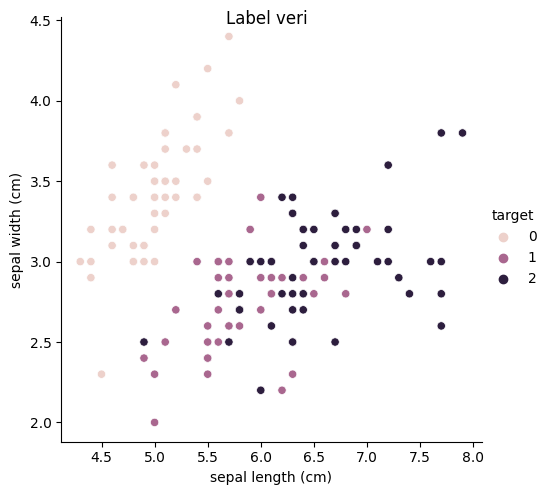

In [3]:
iris = load_iris(as_frame=True)
data = iris.data
targets = iris.target
X = data.loc[:, ('sepal length (cm)', 'sepal width (cm)')].values
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)

labels = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=targets)
labels.fig.suptitle('Label veri')

Text(0.5, 0.98, 'Label predetti dal clustering')

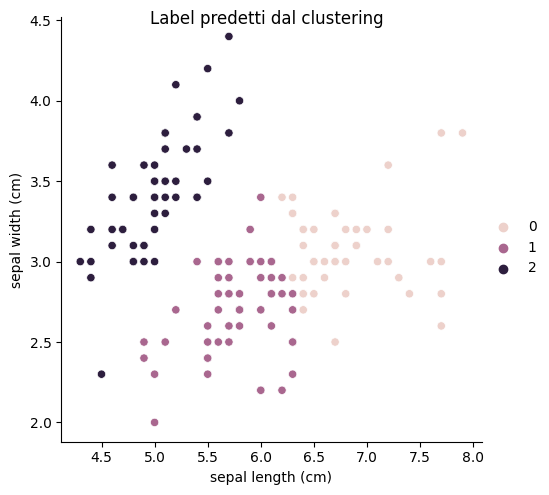

In [4]:
y_pred = kmeans.predict(X)
predictions = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=y_pred)
predictions.fig.suptitle('Label predetti dal clustering')

### **Es 6.1**

Verificare il valore di magnitudine e cardinalità per i cluster identificati nell'esercizio precedente.

Text(0.5, 1.0, 'Cardinalities')

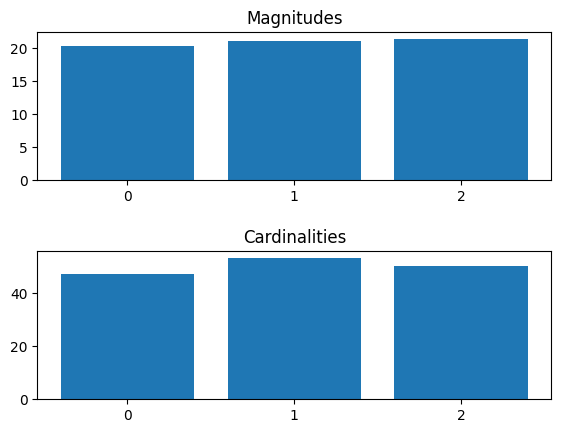

In [5]:
# Ottengo le distanze
X_dist = kmeans.transform(X)

# Funzione per calcolare magnitudine e cardinalità
def get_magnitudes_cardinalities(dists):
    clusters = np.argmin(dists, axis=1)
    distances = np.amin(dists, axis=1)
    dists_cens = list(zip(clusters, distances))
    magnitudes = np.zeros(len(set(clusters)))
    cardinalities = np.zeros(len(set(clusters)))
    for dc in dists_cens:
        magnitudes[dc[0]] += dc[1]
        cardinalities[dc[0]] += 1
    return magnitudes, cardinalities

# Plotto magnitudine e cardinalità
m, c = get_magnitudes_cardinalities(X_dist)
cls_tags = list(range(N_CLUSTERS))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.bar(cls_tags, m)
ax1.set_xticks([0, 1, 2])
ax1.set_title('Magnitudes')
ax2.bar(cls_tags, c)
ax2.set_xticks([0, 1, 2])
ax2.set_title('Cardinalities')

### **Es 6.2**

Valutiamo il valore migliore per il numero di cluster da utilizzare per il K-means utilizzando il dataset Iris e l'approccio empirico discusso a lezione. Usiamo valori per il clustering compresi tra 2 e 4.

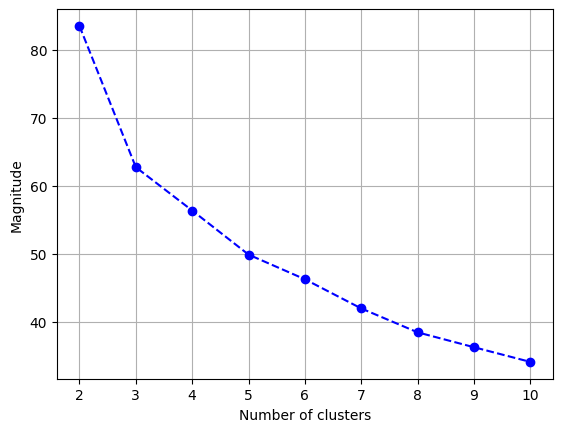

In [6]:
def fit_get_magnitude(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(values)
    m, _ = get_magnitudes_cardinalities(kmeans.transform(values))
    return m.sum()

def get_k_magnitudes(values, min_clusters, max_clusters):
    clusters_values = list(range(min_clusters, max_clusters+1))
    magnitudes = [
        fit_get_magnitude(values, n_clusters) \
        for n_clusters in clusters_values]
    return magnitudes, clusters_values

ms, cvals = get_k_magnitudes(X, 2, 10)

plt.plot(cvals, ms, '--bo')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Magnitude')
plt.show()


Il K-Means parte da alcune ipotesi sulla natura dei diversi cluster in cui sono organizzati i dati, ovvero che questi siano:

1. isotropi, e quindi che abbiano una forma "identica" in tutte le direzioni;

2. ad eguale varianza, e quindi che non vi siano dei cluster di varianza sensibilmente superiore o inferiore alla varianza media dell'insieme degli stessi;
3. ad eguale cardinalità, e quindi che il numero di campioni per i diversi cluster sia all'incirca costante.

Verifichiamo questi assunti su dati generati dal metodo `make_blobs()`.

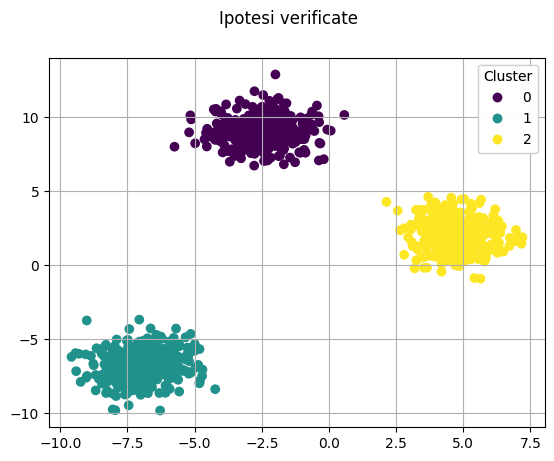

In [7]:
def fit_plot(
    cls,
    X,
    title: str) -> None:
    """ Wrapper per il fit ed il plot delle predizioni.

    Args:
        cls: algoritmo di clustering
        X: dati su cui effettuare il clustering
        title: titolo del plot
    """
    preds = cls.fit_predict(X)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=preds)
    legend = ax.legend(
        *scatter.legend_elements(),
        title='Cluster')
    ax.add_artist(legend)
    fig.suptitle(title)
    ax.grid()
    plt.show()



X, y = make_blobs(n_samples=1000, random_state=42)
kmeans = KMeans(n_clusters=3)
fit_plot(kmeans, X, 'Ipotesi verificate')

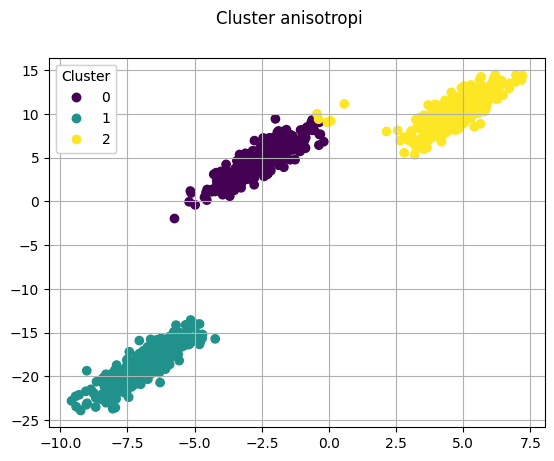

In [8]:
#Per ottenere l'anisotropia, potete applicare una rotazione all'insieme dei dati.
t = np.tan(np.radians(60))
rot = np.array([[1, t], [0, 1]])
X_an = X.dot(rot)

kmeans_an = KMeans(n_clusters=3)
fit_plot(kmeans_an, X_an, 'Cluster anisotropi')

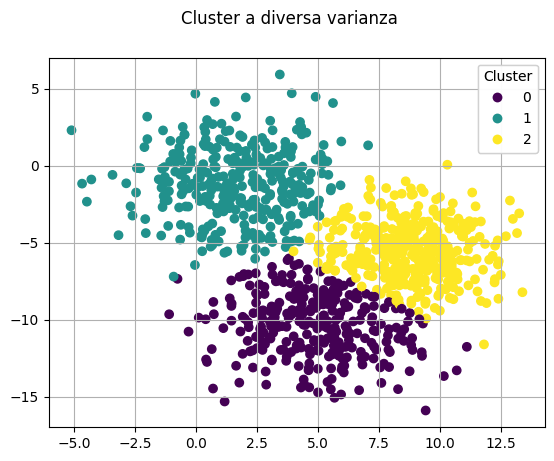

In [9]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=1000,
    random_state=200,
    cluster_std=[1.8, 2.5, 2.4])

kmeans_var = KMeans(n_clusters=3)
fit_plot(kmeans_var, X_var, 'Cluster a diversa varianza')

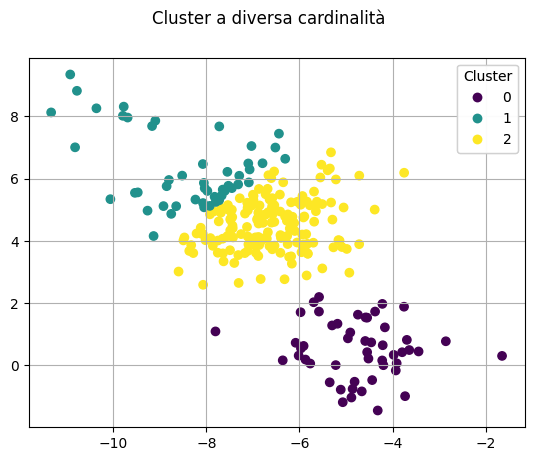

In [10]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=12)
X_uneven = np.concatenate(
    (X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]),
    axis=0)
kmeans_uneven = KMeans(n_clusters=3)
fit_plot(kmeans_uneven, X_uneven, 'Cluster a diversa cardinalità')

### **Es 6.3**

Proviamo ad utilizzare l'algoritmo DBSCAN, implementato mediante la classe `DBSCAN()` del package cluster, nelle tre diverse situazioni ispirate dall'esercizio precedente.

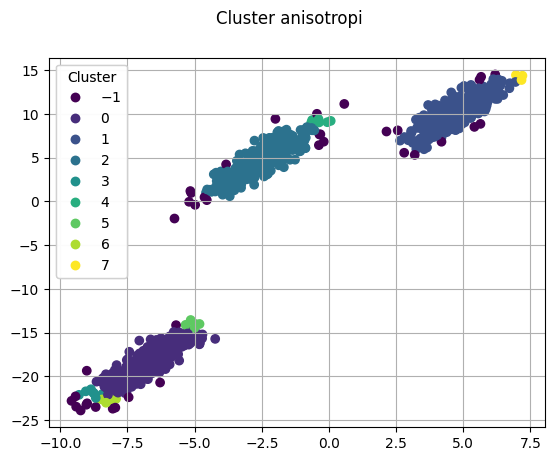

In [11]:
# Ipotesi 1: anisotropia
dbscan_an = DBSCAN()
fit_plot(dbscan_an, X_an, 'Cluster anisotropi')

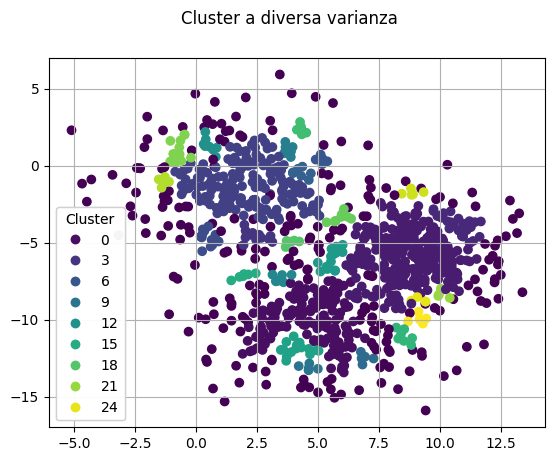

In [12]:
# Ipotesi 2: diversa varianza
dbscan_var = DBSCAN()
fit_plot(dbscan_var, X_var, 'Cluster a diversa varianza')

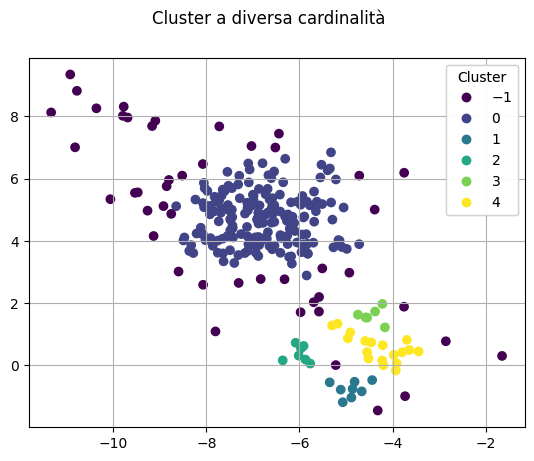

In [13]:
# Ipotesi 3: diversa cardinalità
dbscan_uneven = DBSCAN()
fit_plot(dbscan_uneven, X_uneven, 'Cluster a diversa cardinalità')